# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


    


Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    #pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 18 of Set 1 | labytnangi
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | acarau
Processing Record 21 of Set 1 | tofol
Processing Record 22 of Set 1 | baotou
Processing Record 23 of Set 1 | ashburton
Processing Record 24 of Set 1 | holyhead
Processing Record 25 of Set 1 | stanley
Processing Record 26 of Set 1 | bethel
Processing Record 27 of Set 1 | itororo
Processing Record 28 of Set 1 | albany
Processing Record 29 of Set 1 | bilibino
Processing Record 30 of Set 1 | cable beach
City not found. Skipping...
Processing Record 31 of Set 1 | talnakh
Processing Record 32 of Set 1 | boticas
Processing Record 33 of Set 1 | carloforte
Processing Record 34 of Set 1 | iqaluit
Processing Record 35 of Set 1 | port-aux-francais
Processing Record 36 of Set 1 | taroa
Processing Record 37 of Set 1 | wailua homesteads
Processing Record 38 of Set 1 | edinburgh of the seven seas
Processing Record 39 of Set 1 | bonthe
Processing Record 40 of Set 1 | darwin
Process

In [14]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labytnangi,66.6572,66.4183,57.58,84,9,6.40,RU,1726167439
1,afaahiti,-17.7500,-149.2833,75.15,86,8,22.12,PF,1726167440
2,acarau,-2.8856,-40.1200,82.08,63,8,22.59,BR,1726167442
3,tofol,5.3248,163.0078,84.00,72,77,6.51,FM,1726167443
4,baotou,40.6522,109.8222,69.78,75,100,8.21,CN,1726167444


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labytnangi,66.6572,66.4183,57.58,84,9,6.40,RU,1726167439
1,afaahiti,-17.7500,-149.2833,75.15,86,8,22.12,PF,1726167440
2,acarau,-2.8856,-40.1200,82.08,63,8,22.59,BR,1726167442
3,tofol,5.3248,163.0078,84.00,72,77,6.51,FM,1726167443
4,baotou,40.6522,109.8222,69.78,75,100,8.21,CN,1726167444


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

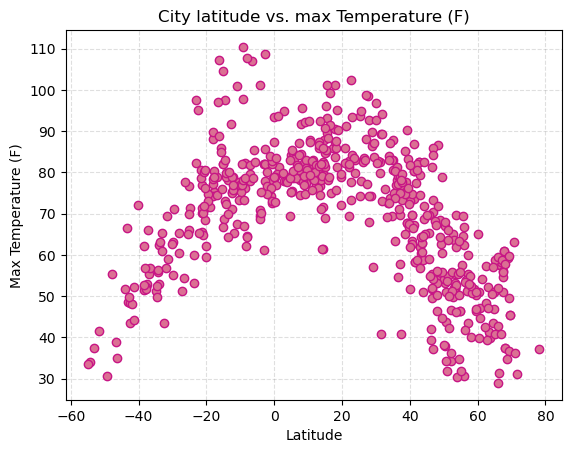

In [25]:
# Build scatter plot for latitude vs. temperature

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, c="palevioletred", edgecolors="mediumvioletred",zorder =2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. max Temperature (F)")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

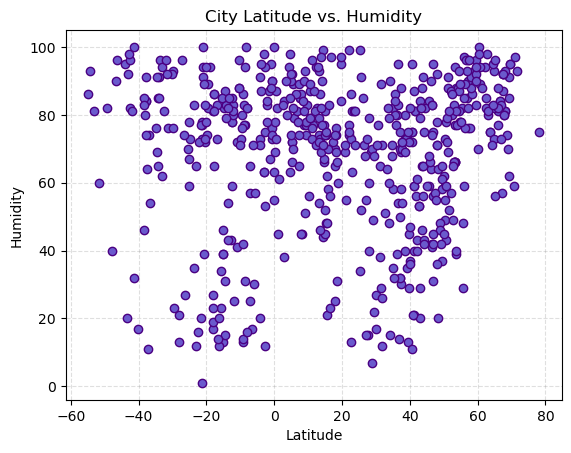

In [26]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, c="slateblue", edgecolors="indigo",zorder =2)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

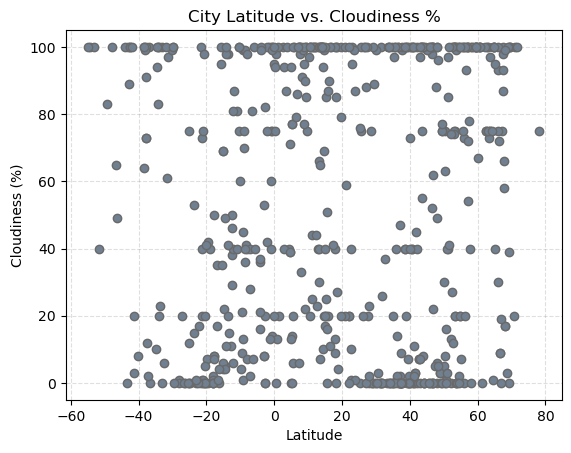

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, c="slategrey", edgecolors="dimgray",zorder =2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness %")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

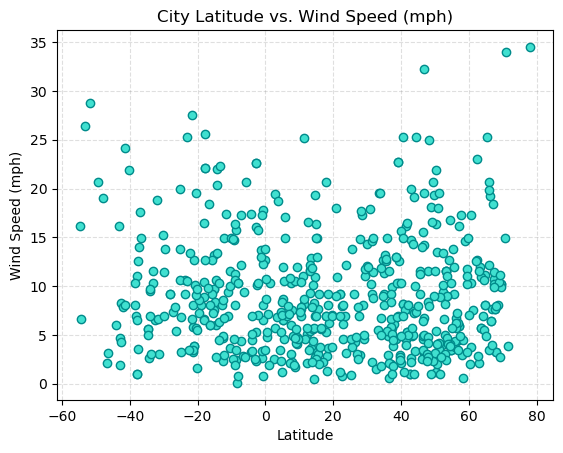

In [29]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, c="turquoise", edgecolors="darkcyan",zorder =2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
def regression_plot(x,y,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rsquared = round(rvalue**2,3)
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")

    xmin= x.min()
    ymin=y.min()
    plt.annotate(line_eq,(xmin,ymin),fontsize=12,color="red")
    plt.show()
    print(f"The Line equation is: {line_eq}")
    print(f"The r-squared is: {rsquared}")

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labytnangi,66.6572,66.4183,57.58,84,9,6.40,RU,1726167439
3,tofol,5.3248,163.0078,84.00,72,77,6.51,FM,1726167443
4,baotou,40.6522,109.8222,69.78,75,100,8.21,CN,1726167444
6,holyhead,53.3062,-4.6321,51.80,66,20,11.50,GB,1726167446
7,stanley,54.8680,-1.6985,46.53,78,20,3.44,GB,1726167447


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,afaahiti,-17.7500,-149.2833,75.15,86,8,22.12,PF,1726167440
2,acarau,-2.8856,-40.1200,82.08,63,8,22.59,BR,1726167442
5,ashburton,-37.8626,145.0794,52.39,84,73,1.01,AU,1726167445
9,itororo,-15.1169,-40.0703,82.02,39,69,9.73,BR,1726167449
17,afaahiti,-17.7500,-149.2833,75.15,86,8,22.12,PF,1726167440


###  Temperature vs. Latitude Linear Regression Plot

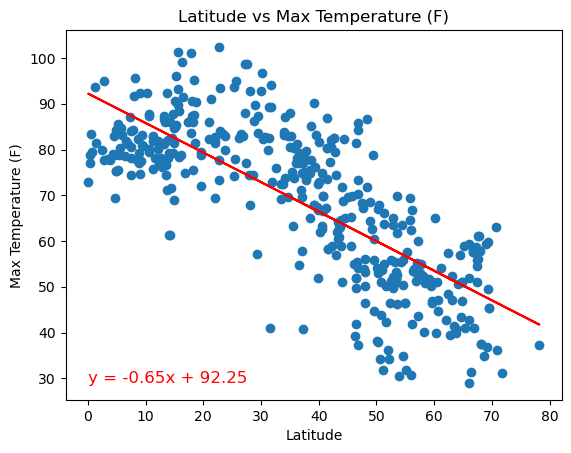

The Line equation is: y = -0.65x + 92.25
The r-squared is: 0.586


In [95]:
# Linear regression on Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Max Temp"]
northern_y_label = "Max Temperature (F)"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label)

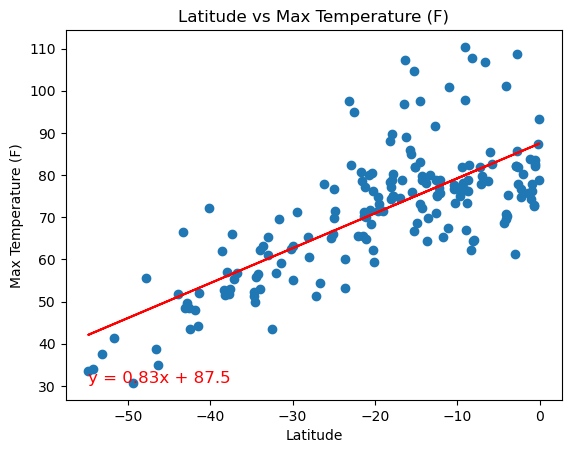

y = 0.83x + 87.5


In [81]:
# Linear regression on Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Max Temp"]
southern_y_label = "Max Temperature (F)"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

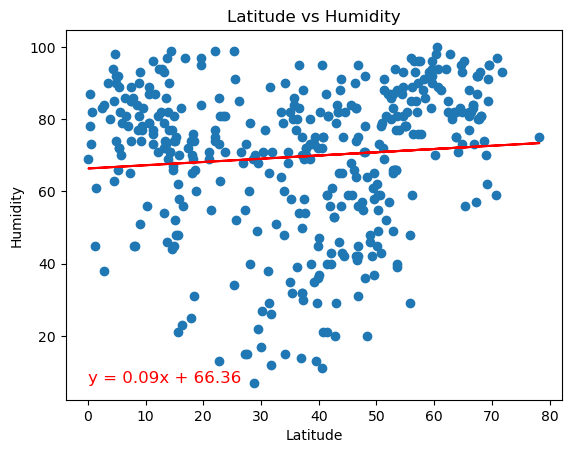

y = 0.09x + 66.36


In [82]:
# Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Humidity"]
northern_y_label = "Humidity"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label)


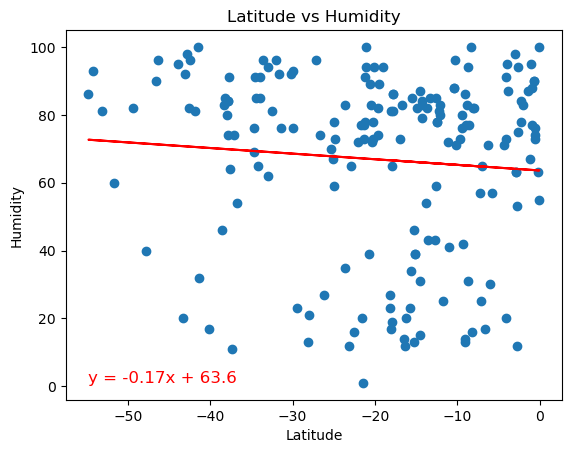

y = -0.17x + 63.6


In [83]:
# Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Humidity"]
southern_y_label = "Humidity"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

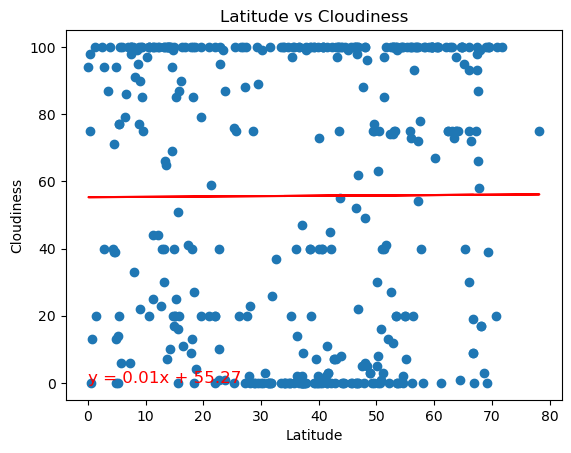

y = 0.01x + 55.27


In [84]:
# Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Cloudiness"]
northern_y_label = "Cloudiness"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label)

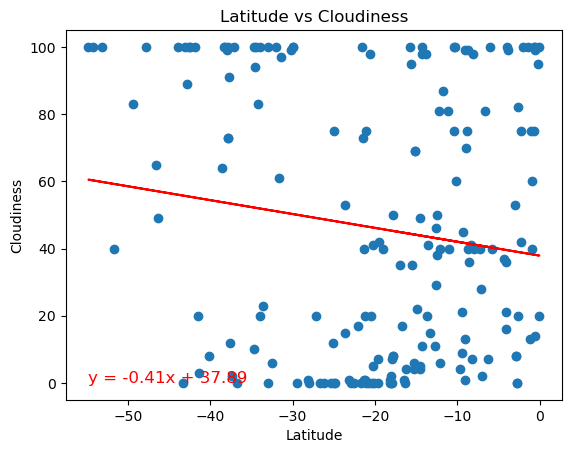

y = -0.41x + 37.89


In [85]:
# Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Cloudiness"]
southern_y_label = "Cloudiness"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

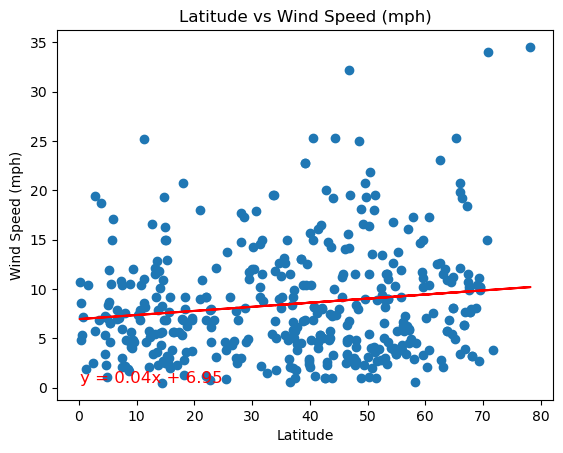

y = 0.04x + 6.95


In [86]:
# Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Wind Speed"]
northern_y_label = "Wind Speed (mph)"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label)

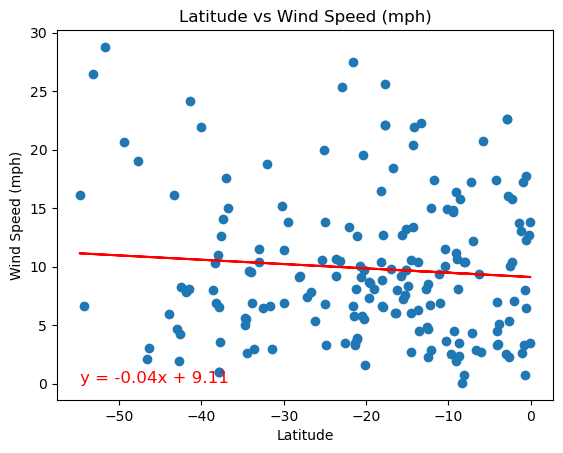

y = -0.04x + 9.11


In [87]:
# Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Wind Speed"]
southern_y_label = "Wind Speed (mph)"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE